# Forecasting Winter Bed Occupancy 

### Marcos Fabietti
### Nottingham University Hospitals
### 31/01/2025

## Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#load csv
df=pd.read_csv('synthetic_data.csv')
#transform date to datetime
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y",dayfirst=True)
#visualise format
df.head()

,Date,Elective,Emergency
0,2021-04-01,90,475
1,2021-04-02,85,465
2,2021-04-03,82,471
3,2021-04-04,78,492
4,2021-04-05,79,516


In [3]:
# Define Christmas period
christmas_period = pd.DataFrame({
  'holiday': 'christmas_period',
  'ds': pd.to_datetime(['2018-12-24','2019-12-24',
                        '2020-12-24','2021-12-24',
                        '2022-12-24','2023-12-24',
                        '2024-12-24']),
  'lower_window': -7,
  'upper_window': 15,
})

## Elective Analysis

In [4]:
#subset elective
df2_elective=df[['Date','Elective']]
#drop/ fill na
df2_elective=df2_elective.dropna() # .fillna(0)
#rename columns per Prophet requirement
df2_elective.columns=['ds','y']

In [5]:
# Create elective Prophet model
m = Prophet(changepoint_prior_scale=0.01,
           yearly_seasonality='auto', #we have monthly data
           weekly_seasonality='auto', #we have daily data
           daily_seasonality='auto', #we dont have hourly data, so can omit
           holidays=christmas_period) #give it the christmas period
#fit the model
m.fit(df2_elective)
#forecast over X days, in our case X=34, with days frequency (D)
future = m.make_future_dataframe(periods=(34), freq='D')
#create forecast
fcst_elective = m.predict(future)

09:36:23 - cmdstanpy - INFO - Chain [1] start processing
09:36:24 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

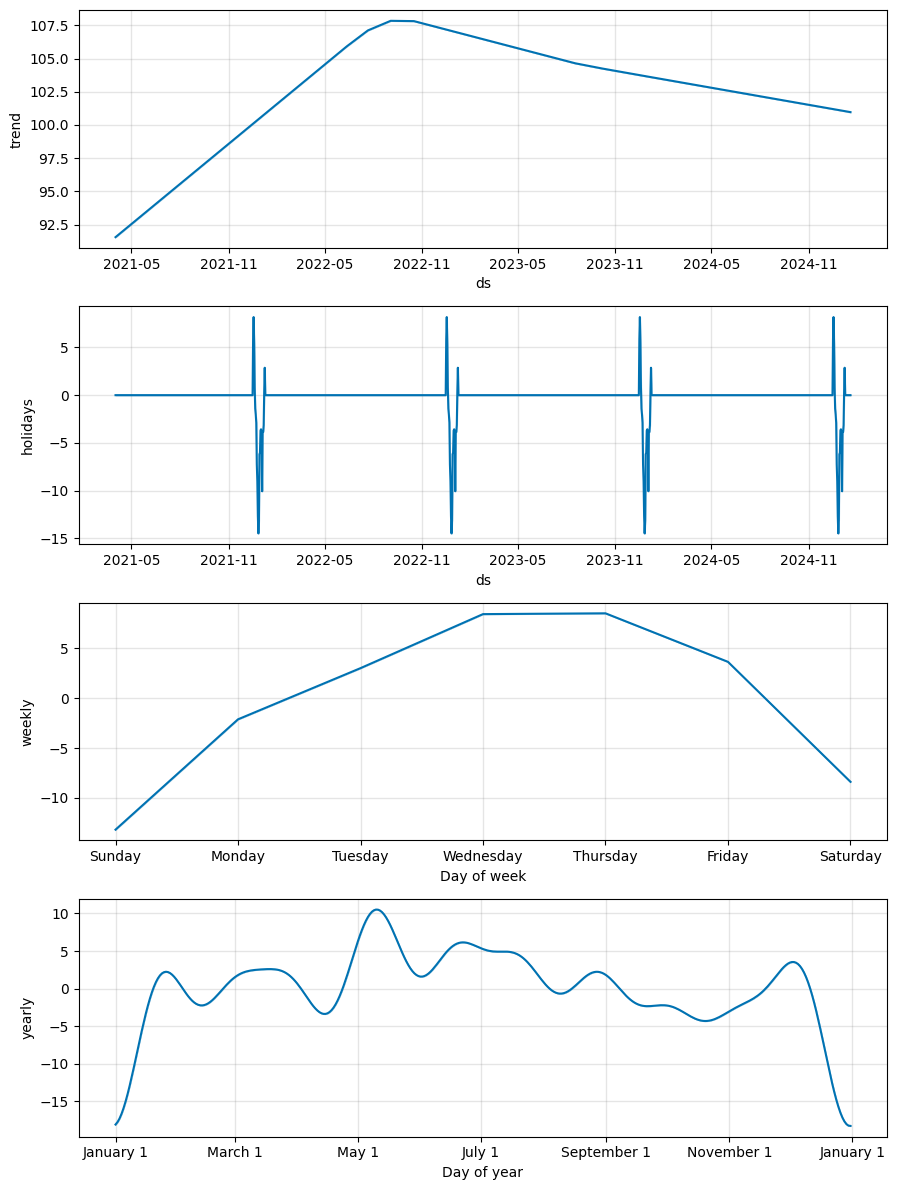

In [6]:
#plot elective decomposition
fig = m.plot_components(fcst_elective)

In [7]:
#create a 1 year offset of year
elective_data_from_2023=df2_elective[df2_elective.ds>='2023-11-15']
elective_data_from_2023=elective_data_from_2023[elective_data_from_2023.ds<'2024-01-20']
elective_data_from_2023['ds']=elective_data_from_2023['ds']+pd.DateOffset(years=1)
elective_data_from_2023.reset_index(inplace=True, drop=True)

C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

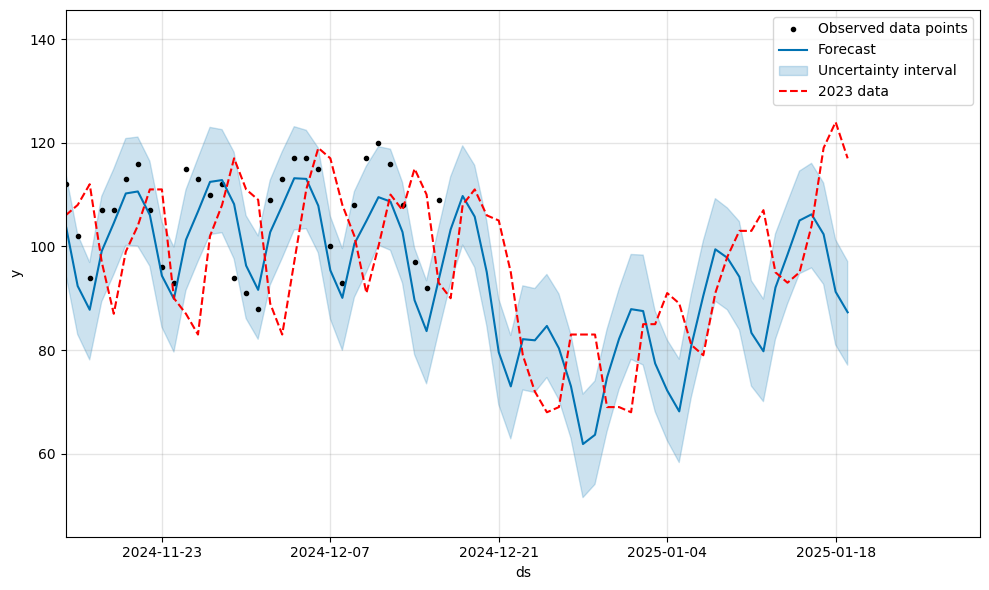

In [8]:
#plot elective forecast
fig = plt.figure(figsize=(10, 6))
m.plot(fcst_elective) #forecast
plt.plot(elective_data_from_2023.ds, elective_data_from_2023.y,'r--',label='2023 data')  #last year'sdata
plt.xlim(pd.to_datetime(['2024-11-15', '2025-01-30'])) 
plt.legend()

## Emergency Analysis

In [9]:
#subset elective
df2_emergency=df[['Date','Emergency']]
#drop/ fill na
df2_emergency=df2_emergency.dropna() # .fillna(0)
#rename columns per Prophet requirement
df2_emergency.columns=['ds','y']

In [10]:
# Create elective Prophet model
m = Prophet(changepoint_prior_scale=0.01,
           yearly_seasonality='auto', #we have monthly data
           weekly_seasonality='auto', #we have weekly data
           daily_seasonality='auto', #we have hourly data
           holidays=christmas_period) #give it the christmas period
#fit the model
m.fit(df2_emergency)
#forecast over X days, in our case X=34 days (D)
future = m.make_future_dataframe(periods=(34), freq='D')
#create forecast
fcst_emergency = m.predict(future)

09:36:29 - cmdstanpy - INFO - Chain [1] start processing
09:36:29 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

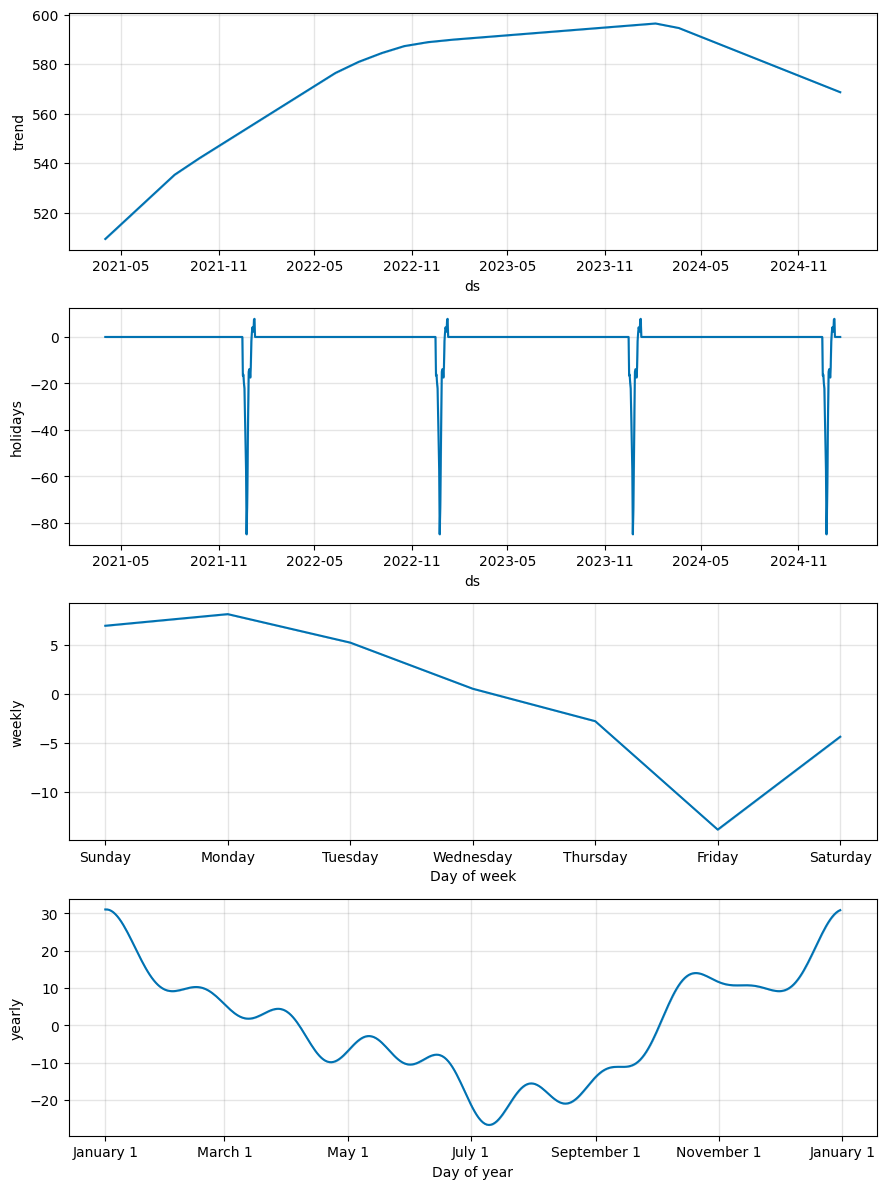

In [11]:
#plot emergency decomposition
fig = m.plot_components(fcst_emergency)

In [12]:
#create a 1 year offset of data from last year for reference
emergency_data_from_2023=df2_emergency[df2_emergency.ds>='2023-11-15']
emergency_data_from_2023=emergency_data_from_2023[emergency_data_from_2023.ds<'2024-01-20']
emergency_data_from_2023['ds']=emergency_data_from_2023['ds']+pd.DateOffset(years=1)
emergency_data_from_2023.reset_index(inplace=True, drop=True)

C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\marcos.fabietti\.conda\envs\EDF\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

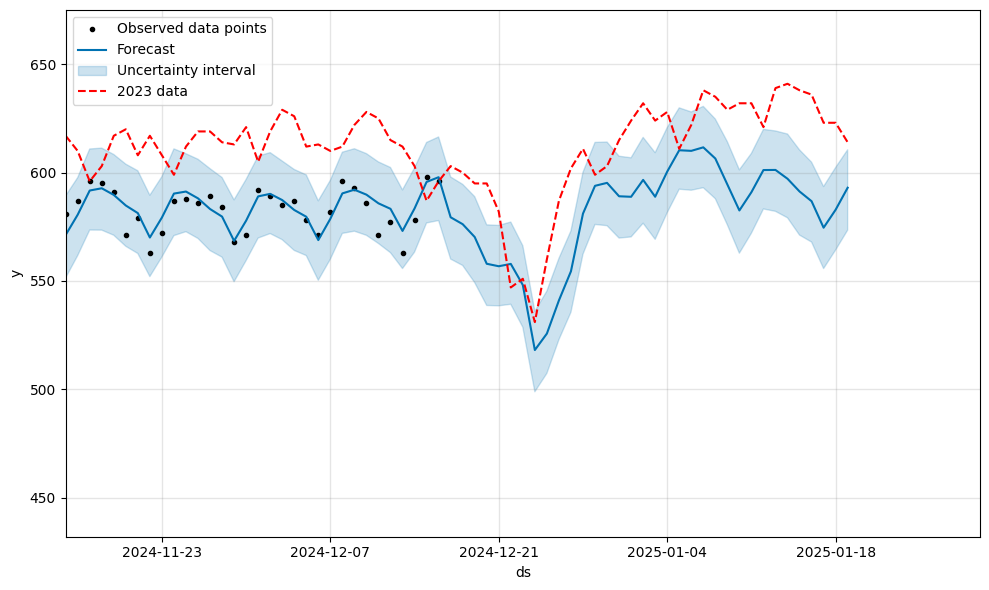

In [13]:
#plot emergency forecast
fig = plt.figure(figsize=(10, 6))
m.plot(fcst_emergency)#forecast
plt.plot(emergency_data_from_2023.ds, emergency_data_from_2023.y,'r--',label='2023 data')  #last year'sdata
plt.xlim(pd.to_datetime(['2024-11-15', '2025-01-30'])) 
plt.legend()

## Aggregate both forecasts

In [14]:
#extract date and forecast from prophet dataframes
fcst_emergency_ss=fcst_emergency[['ds','yhat']]
fcst_emergency_ss.columns=['ds','emergency']
fcst_elective_ss=fcst_elective[['ds','yhat']]
fcst_elective_ss.columns=['ds','elective']
# join on ds
aggregate_forecast=fcst_emergency_ss.merge(fcst_elective_ss, on='ds', how='left')
aggregate_forecast['Total occupancy']=aggregate_forecast['emergency']+aggregate_forecast['elective']

In [15]:
#create a 1 year offset of data from last year for reference
total_data_from_2023=aggregate_forecast[aggregate_forecast.ds>='2023-11-15']
total_data_from_2023=total_data_from_2023[total_data_from_2023.ds<'2024-01-20']
total_data_from_2023['ds']=total_data_from_2023['ds']+pd.DateOffset(years=1)
total_data_from_2023.reset_index(inplace=True, drop=True)

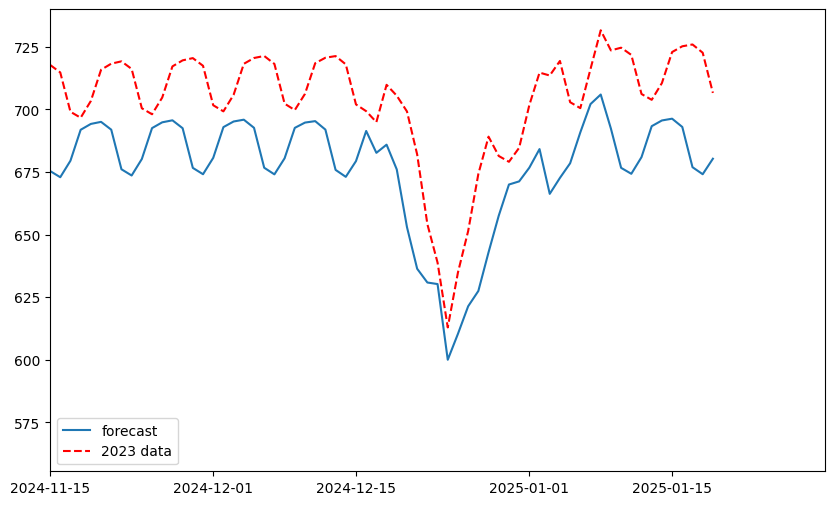

In [16]:
#plot total forecast
fig = plt.figure(figsize=(10, 6))
plt.plot(aggregate_forecast['ds'],aggregate_forecast['Total occupancy'], label='forecast') #plot forecast
plt.plot(total_data_from_2023['ds'],total_data_from_2023['Total occupancy'],'r--',label='2023 data') #plot 2023 data
plt.xlim(pd.to_datetime(['2024-11-15', '2025-01-30'])) 
plt.legend()

In [17]:
#save into a csv
#aggregate_forecast.to_csv('aggregate_forecast.csv')

## Posterior Validation of Forcast

### Load libraries and define functions

In [18]:
from darts import TimeSeries
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
from darts.utils.statistics import plot_residuals_analysis

In [19]:
#get evaluation metrics
def getmetrics(val, lag):    
    res_mape = mape(val, lag)
    res_mae = mae(val, lag)
    res_r2 = r2_score(val, lag)
    res_rmse = rmse(val, lag)
    res_rmsle = rmsle(val, lag)
    res_accuracy = {"MAPE":res_mape, "MAE":res_mae, "R squared":-res_r2, "RMSE":res_rmse, "RMSLE":res_rmsle}
    return res_accuracy

In [20]:
#Generate result plots
def getresultplots(test_ts,pred_ts,model_name):
    #ts plot
    plt.figure(101, figsize=(12, 5))
    test_ts.plot(label='true values')
    pred_ts.plot(label='prediction')
    plt.title(model_name)
    plt.legend();

    # residual plot
    resid = pred_ts - test_ts
    plot_residuals_analysis(resid);
    plt.title(model_name)
    
    metrics_results=getmetrics(test_ts, pred_ts)
    df_acc = pd.DataFrame.from_dict(metrics_results, orient="index", columns=[model_name])
    pd.set_option("display.precision",3)
    display(df_acc.style.highlight_min(color="lightgreen", axis=1))

### Load Validation data

In [21]:
#load csv
true_ts=pd.read_csv('true_data_over_forecast.csv')
#transform date to datetime
true_ts['Date']=pd.to_datetime(true_ts['Date'],format="%d/%m/%Y",dayfirst=True)
true_ts['Total occupancy']=true_ts['Actual_Elective_Occupancy']+true_ts['Actual _Emergency_Occupancy']
#visualise format
true_ts.head()

,Date,Actual_Elective_Occupancy,Actual _Emergency_Occupancy,Total occupancy
0,2024-12-17,110,584,694
1,2024-12-18,121,596,717
2,2024-12-19,112,593,705
3,2024-12-20,111,571,682
4,2024-12-21,98,576,674


### Elective Occupancy

,ELECTIVE
MAPE,8.690576
MAE,7.812785
R squared,-0.683454
RMSE,9.246238
RMSLE,0.104527


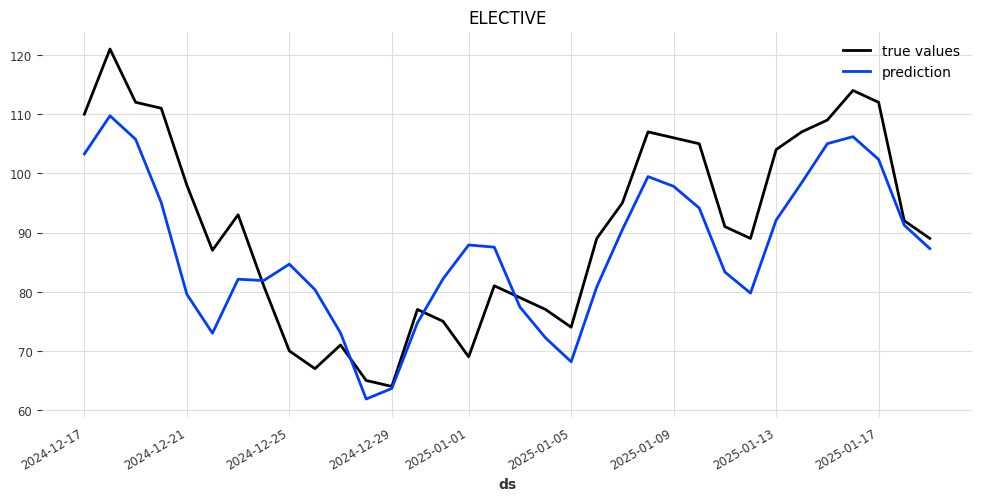

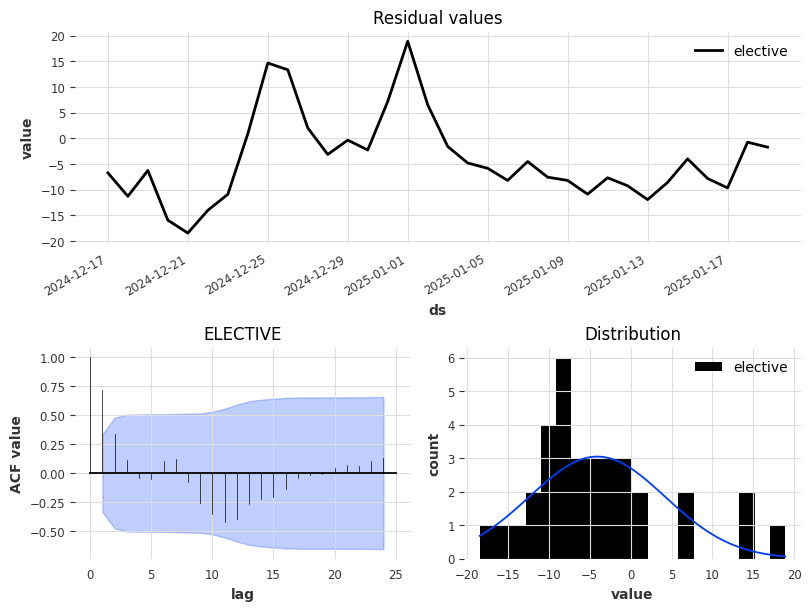

In [22]:
true_series = TimeSeries.from_dataframe(true_ts, 'Date', 'Actual_Elective_Occupancy')
fcst_series = TimeSeries.from_dataframe(aggregate_forecast.iloc[-34:], 'ds', 'elective')
getresultplots(true_series, fcst_series,'ELECTIVE')

### Emergency Occupancy

,EMERGENCY
MAPE,4.665597
MAE,28.892704
R squared,0.007569
RMSE,31.554354
RMSLE,0.051925


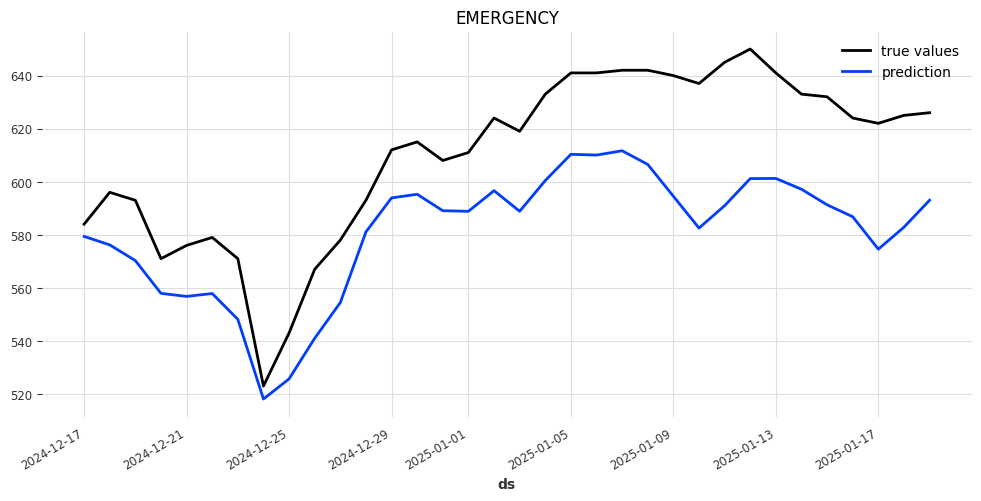

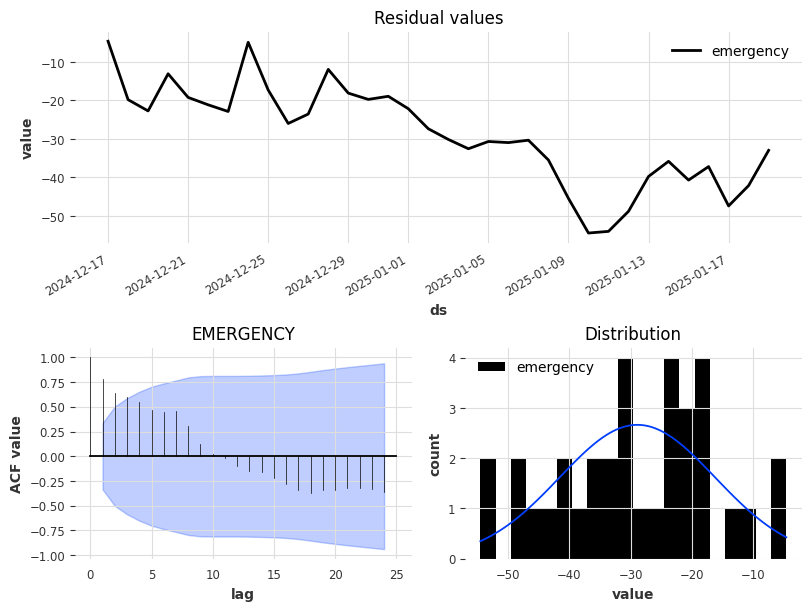

In [23]:
true_series = TimeSeries.from_dataframe(true_ts, 'Date', 'Actual _Emergency_Occupancy')
fcst_series = TimeSeries.from_dataframe(aggregate_forecast.iloc[-34:], 'ds', 'emergency')
getresultplots(true_series, fcst_series,'EMERGENCY')

### Total Occupancy

,Total occupancy
MAPE,4.608942
MAE,32.969680
R squared,-0.084262
RMSE,36.973056
RMSLE,0.052740


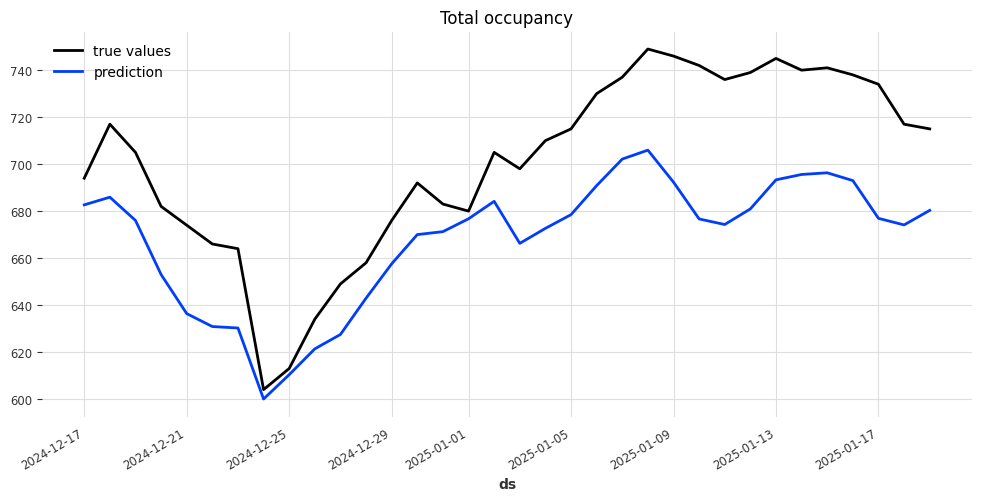

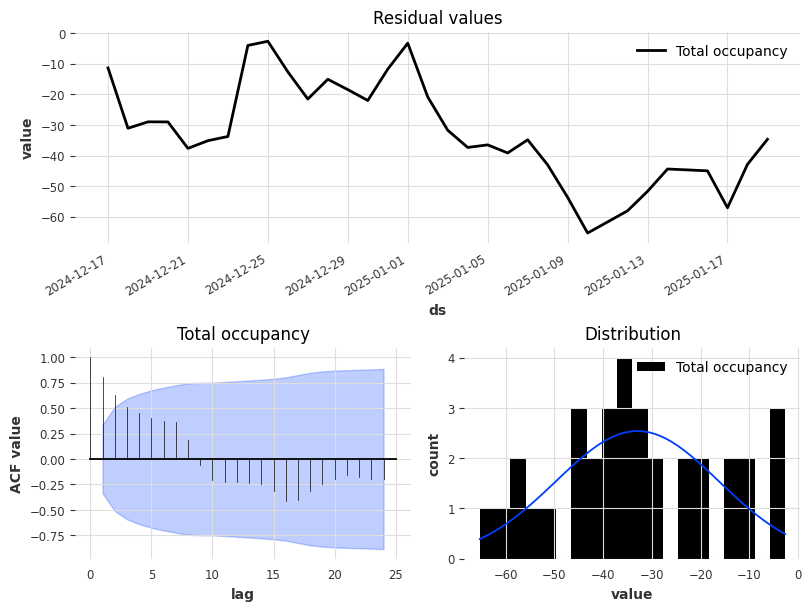

In [24]:
true_series = TimeSeries.from_dataframe(true_ts, 'Date', 'Total occupancy')
fcst_series = TimeSeries.from_dataframe(aggregate_forecast.iloc[-34:], 'ds', 'Total occupancy')
getresultplots(true_series, fcst_series,'Total occupancy')